## 1. Создать таблицы со следующими структурами и загрузить данные из csv-файлов. 
Скрипты:

In [ ]:
create table customers_table(
	customer_id	int,
	first_name varchar,
	last_name varchar,
	gender varchar,
	DOB date,
	job_title varchar,
	job_industry_category varchar,
	wealth_segment varchar,
	deceased_indicator varchar,
	owns_car varchar,
	address varchar,
	postcode int,
	state varchar,
	country varchar,
	property_valuation int
);

select * from customers_table ct;

create table transactions_table(
	transaction_id int,
	product_id int,
	customer_id	int,
	transaction_date date,
	online_order bool,
	order_status varchar,
	brand varchar,
	product_line varchar, 
	product_class varchar,
	product_size varchar,
	list_price float,
	standard_cost float
);

select * from transactions_table tt;

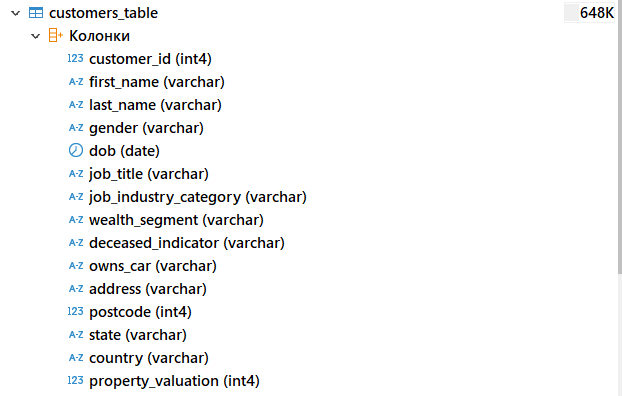
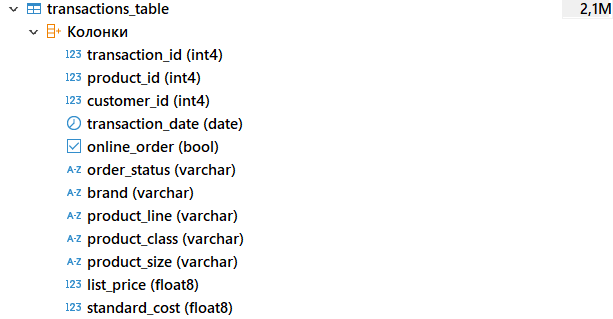
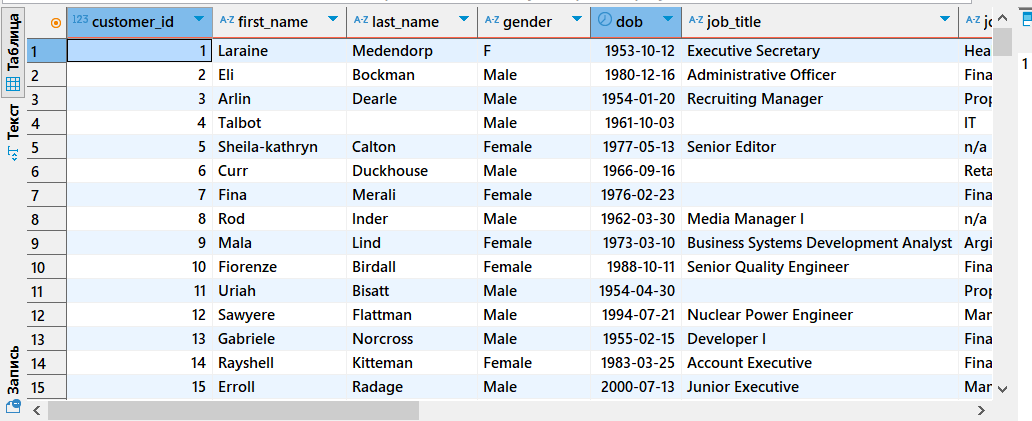
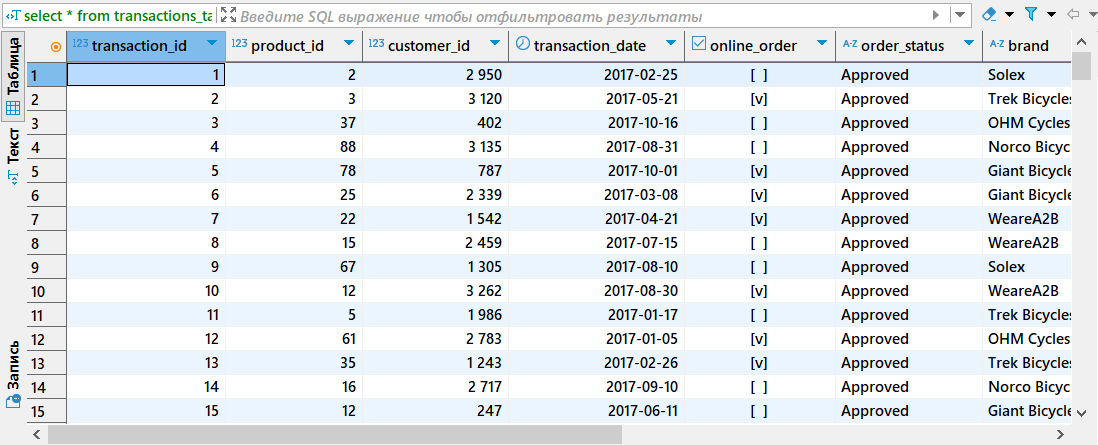

## 2.

### (1 балл) Вывести все уникальные бренды, у которых стандартная стоимость выше 1500 долларов.

In [ ]:
select distinct brand from transactions_table tt
where tt.standard_cost > 1500;

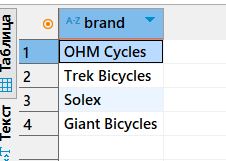

### (1 балл) Вывести все подтвержденные транзакции за период '2017-04-01' по '2017-04-09' включительно.

In [ ]:
select transaction_id from transactions_table tt 
where tt.transaction_date >= '2017-04-01' and tt.transaction_date <= '2017-04-09' and tt.order_status = 'Approved' ;

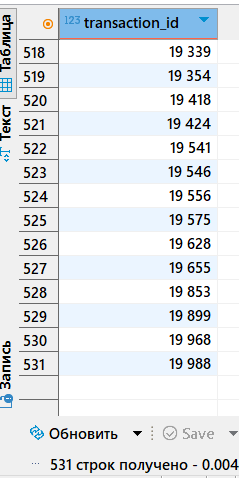

### (1 балл) Вывести все профессии у клиентов из сферы IT или Financial Services, которые начинаются с фразы 'Senior'.

In [ ]:
select job_title from customers_table ct
where (ct.job_industry_category = 'IT' or ct.job_industry_category = 'Financial Services') and job_title like'Senior%'

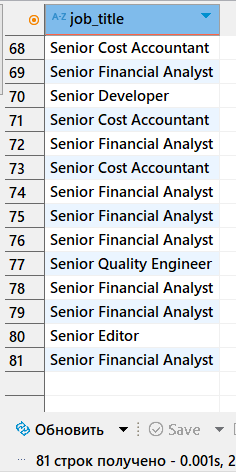

### (1 балл) Вывести все бренды, которые закупают клиенты, работающие в сфере Financial Services

In [ ]:
select distinct brand from transactions_table tt
where tt.customer_id in (select customer_id from customers_table ct
						where ct.job_industry_category = 'Financial Services');

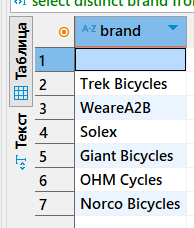

### (1 балл) Вывести 10 клиентов, которые оформили онлайн-заказ продукции из брендов 'Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles'.

In [ ]:
select customer_id, first_name, last_name from customers_table ct 
where customer_id in (select customer_id from transactions_table tt 
						where tt.online_order and tt.brand in ('Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles')) limit(10);

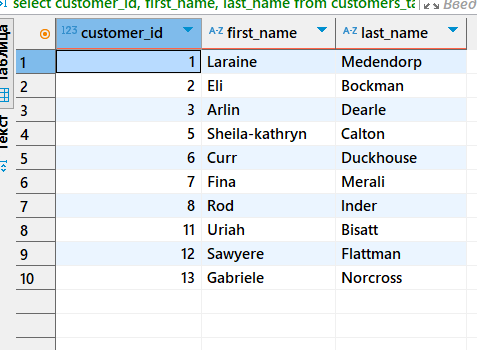

### (1 балл) Вывести всех клиентов, у которых нет транзакций.

In [ ]:
select customer_id, first_name, last_name from customers_table ct 
where customer_id not in (select customer_id from transactions_table tt);

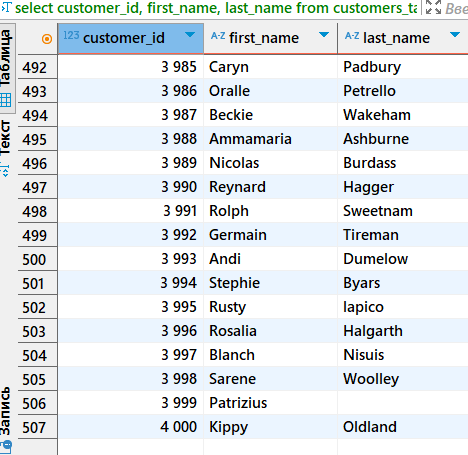

### (2 балла) Вывести всех клиентов из IT, у которых транзакции с максимальной стандартной стоимостью.

In [ ]:
select customer_id, first_name, last_name from customers_table ct
where ct.job_industry_category = 'IT' and customer_id in (select customer_id from transactions_table tt
                                						where tt.standard_cost = (select max(standard_cost) from transactions_table));

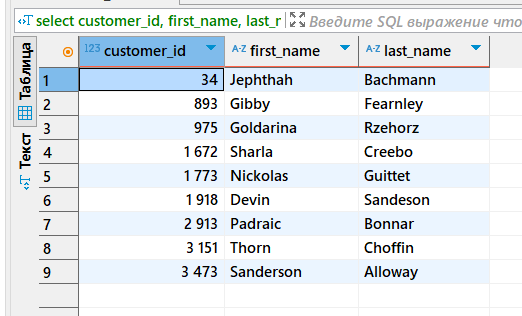

### (2 балла) Вывести всех клиентов из сферы IT и Health, у которых есть подтвержденные транзакции за период '2017-07-07' по '2017-07-17'.

In [ ]:
select customer_id, first_name, last_name from customers_table ct
where ct.job_industry_category in ('IT', 'Health') 
	and customer_id in (select customer_id from transactions_table tt
						where tt.order_status = 'Approved' 
							and tt.transaction_date > '2017-07-07' 
							and tt.transaction_date < '2017-07-17');

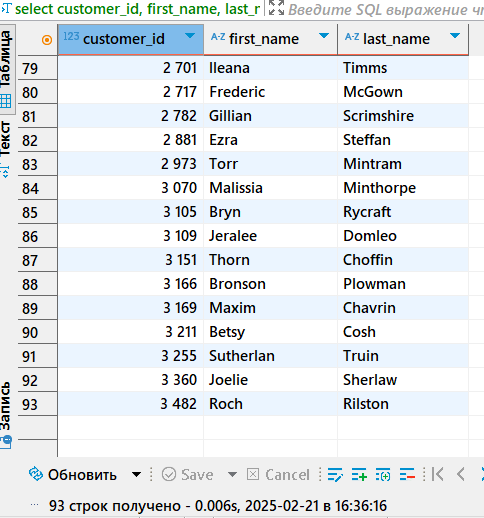